In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


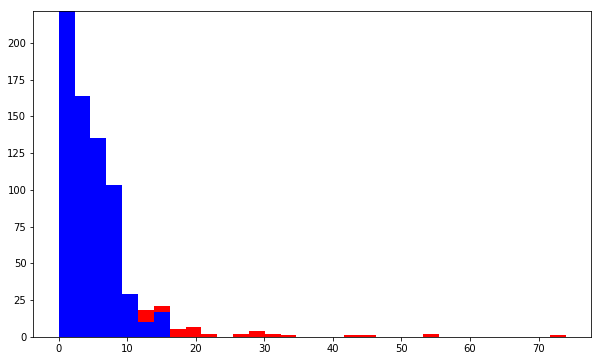

16    2016/9/1 16:00
19    2016/9/1 19:00
19    2016/9/1 19:00
27    2016/9/2 03:00
43    2016/9/2 19:00
12    2016/9/1 12:00
20    2016/9/1 20:00
45    2016/9/2 21:00
16    2016/9/1 16:00
20    2016/9/1 20:00
12    2016/9/1 12:00
16    2016/9/1 16:00
16    2016/9/1 16:00
31    2016/9/2 07:00
27    2016/9/2 03:00
20    2016/9/1 20:00
12    2016/9/1 12:00
34    2016/9/2 10:00
18    2016/9/1 18:00
12    2016/9/1 12:00
28    2016/9/2 04:00
21    2016/9/1 21:00
32    2016/9/2 08:00
12    2016/9/1 12:00
18    2016/9/1 18:00
23    2016/9/1 23:00
18    2016/9/1 18:00
54    2016/9/3 06:00
54    2016/9/3 06:00
19    2016/9/1 19:00
29    2016/9/2 05:00
30    2016/9/2 06:00
12    2016/9/1 12:00
29    2016/9/2 05:00
20    2016/9/1 20:00
12    2016/9/1 12:00
18    2016/9/1 18:00
17    2016/9/1 17:00
74    2016/9/4 02:00
12    2016/9/1 12:00
Name: timestamp, dtype: object


In [36]:
file='data.csv'
data = pd.read_csv(file)
df = data[['count']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df)
data = pd.DataFrame(np_scaled)
outliers_fraction = 0.05
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)
res = pd.Series(model.predict(data))
res.unique()
# visualisation of anomaly with avg price repartition
a = df.loc[res == 1, 'count']
b = df.loc[res == -1, 'count']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();
data = pd.read_csv(file)
ts = data['timestamp']
print(ts[df.loc[res==-1,'count']])